# Oil Price Prediction Using Machine Learning

In [1]:
# LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 

# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 

# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

[*********************100%***********************]  1 of 1 completed


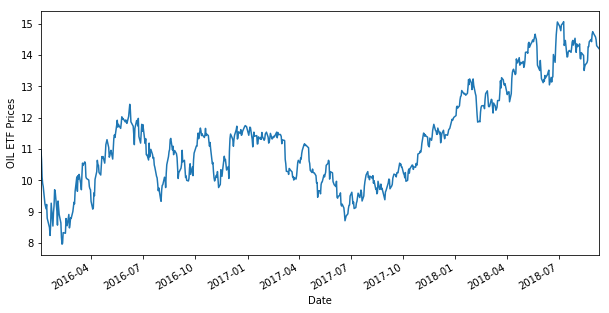

In [2]:
# Read data 
Df = yf.download('USO','2016-01-01','2018-09-10')

# Only keep close columns 
Df=Df[['Close']] 

# Drop rows with missing values 
Df= Df.dropna() 

# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("OIL ETF Prices")
plt.show()

In [3]:
# Define explanatory variables
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2016-01-15,9.163333,9.798889
2016-01-19,9.036667,9.555555
2016-01-20,8.836666,9.314444
2016-01-21,8.506667,9.106667
2016-01-22,8.430000,8.957778


In [4]:
# Define dependent variable
y = Df['Close']
y.head()

Date
2016-01-15    8.79
2016-01-19    8.49
2016-01-20    8.24
2016-01-21    8.56
2016-01-22    9.27
Name: Close, dtype: float64

In [5]:
# Split the data into train and test dataset
t=.8 
t = int(t*len(Df)) 

# Train dataset 
X_train = X[:t] 
y_train = y[:t]  

# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [6]:
# Create a linear regression model
# Y = m1 * X1 + m2 * X2 + C
# Gold ETF price = m1 * 3 days moving average + m2 * 15 days moving average + c
linear = LinearRegression().fit(X_train,y_train) 
print("MJ ETF Price =", round(linear.coef_[0],2), "* 3 Days Moving Average", round(linear.coef_[1],2), "* 9 Days Moving Average +", round(linear.intercept_,2))

MJ ETF Price = 1.19 * 3 Days Moving Average -0.23 * 9 Days Moving Average + 0.38


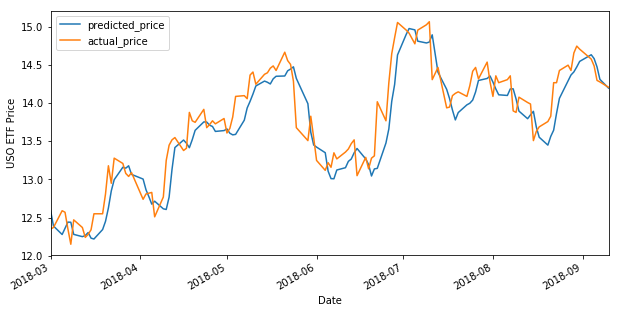

In [7]:
# Predicting the Oil ETF prices
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("USO ETF Price")  
plt.show()

In [8]:
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

85.81

Oil Stock

In [9]:
Oil_stock = ['PBR', 'VALE', 'RIG', 'WLL']

In [10]:
start = '2016-01-01'
end = '2018-09-10'
df = yf.download(Oil_stock,start,end)

[*********************100%***********************]  4 of 4 completed


In [11]:
stocks = pd.DataFrame(df['Adj Close'])
stocks.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-04,4.146681,12.55,2.823366,38.119999
2016-01-05,4.068809,12.15,2.814432,36.160000
2016-01-06,3.844927,11.52,2.599999,31.639999
2016-01-07,3.708651,11.00,2.421305,30.160000
2016-01-08,3.650247,10.75,2.323023,31.080000


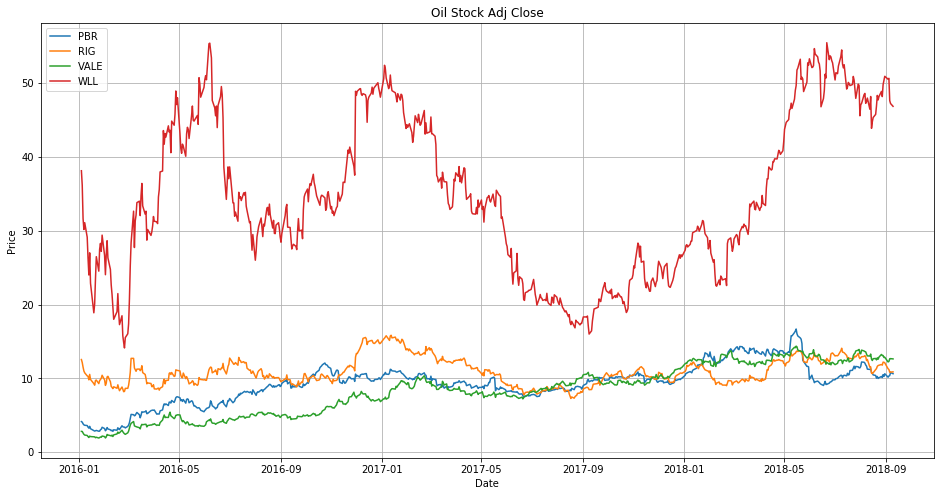

In [12]:
plt.figure(figsize=(16,8))
plt.plot(stocks)
plt.title('Oil Stock Adj Close')
plt.legend(stocks)
plt.grid()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

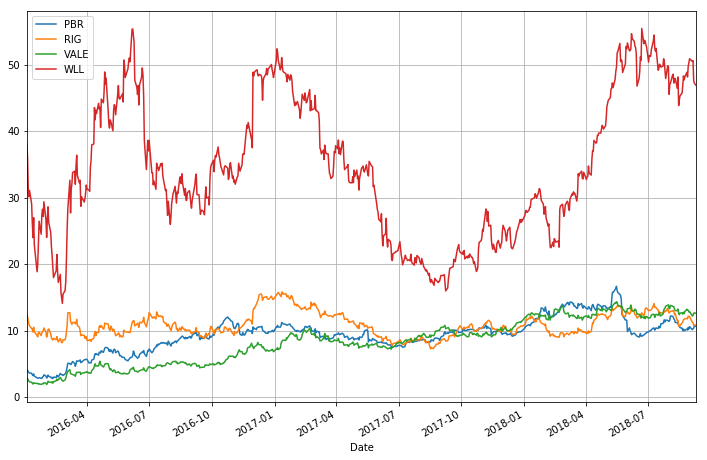

In [13]:
stocks.plot(grid = True, figsize=(12,8))

In [14]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-04,1.000000,1.000000,1.000000,1.000000
2016-01-05,0.981221,0.968127,0.996836,0.948583
2016-01-06,0.927230,0.917928,0.920886,0.830011
2016-01-07,0.894366,0.876494,0.857595,0.791186
2016-01-08,0.880282,0.856574,0.822785,0.815320


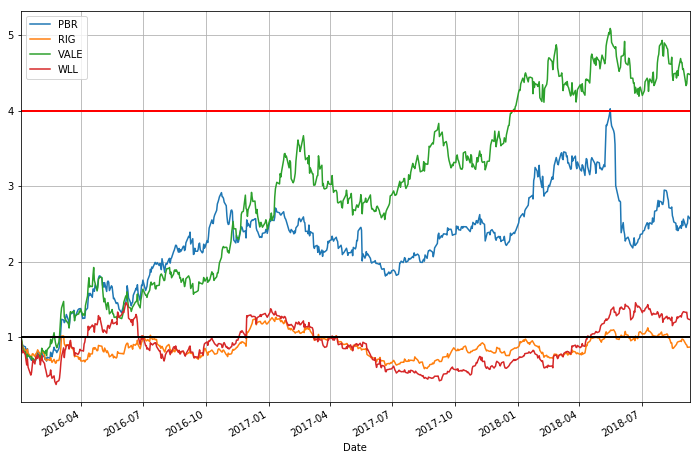

In [15]:
stock_return.plot(grid = True, figsize=(12,8)).axhline(y = 1, color = "black", lw = 2)
plt.axhline(y=4, color = 'red', lw=2)

In [16]:
stock_return = stocks.pct_change(1).dropna()
stock_return.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-05,-0.018779,-0.031873,-0.003164,-0.051417
2016-01-06,-0.055024,-0.051852,-0.076191,-0.125000
2016-01-07,-0.035443,-0.045139,-0.068728,-0.046776
2016-01-08,-0.015748,-0.022727,-0.040591,0.030504
2016-01-11,-0.010667,-0.038140,-0.023077,-0.063063


In [17]:
stock_return.tail()

,PBR,RIG,VALE,WLL
Date,,,,
2018-09-04,-0.043238,-0.066887,-0.049242,-0.007857
2018-09-05,0.015385,-0.008850,0.005578,0.002376
2018-09-06,0.006629,-0.033036,0.029319,-0.059648
2018-09-07,0.038570,0.001847,0.001540,-0.008192
2018-09-10,-0.014493,0.002765,-0.003075,-0.008047


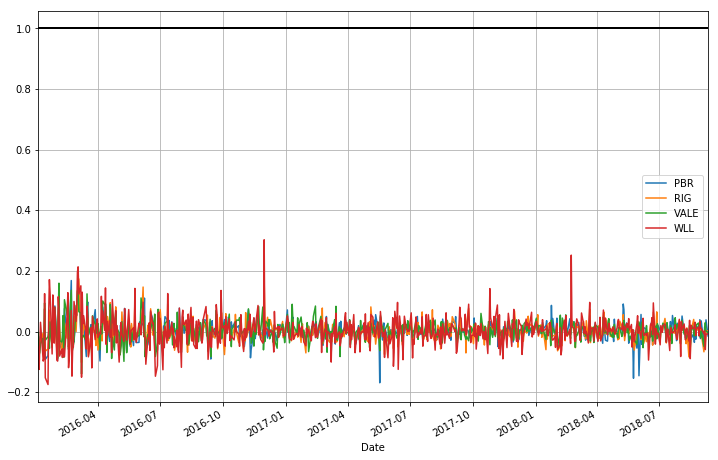

In [18]:
stock_return.plot(grid = True, figsize=(12,8)).axhline(y = 1, color = "black", lw = 2)

In [19]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.018958,-0.032392,-0.003170,-0.052786
2016-01-06,-0.056596,-0.053244,-0.079249,-0.133531
2016-01-07,-0.036086,-0.046189,-0.071204,-0.047906
2016-01-08,-0.015873,-0.022990,-0.041437,0.030048


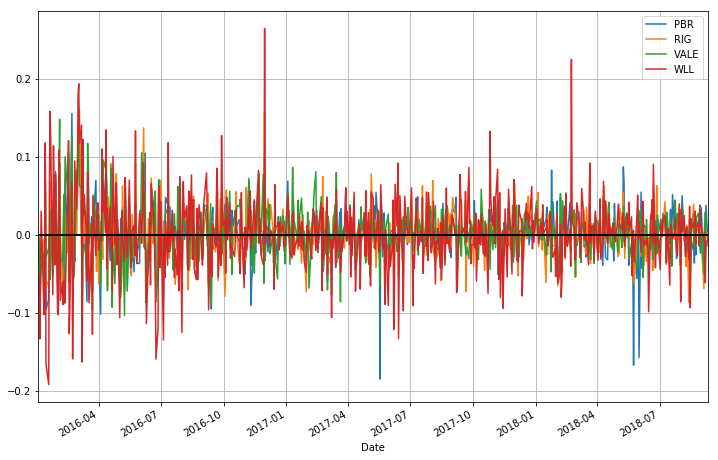

In [20]:
stock_change.plot(grid = True, figsize=(12,8)).axhline(y = 0, color = "black", lw = 2)

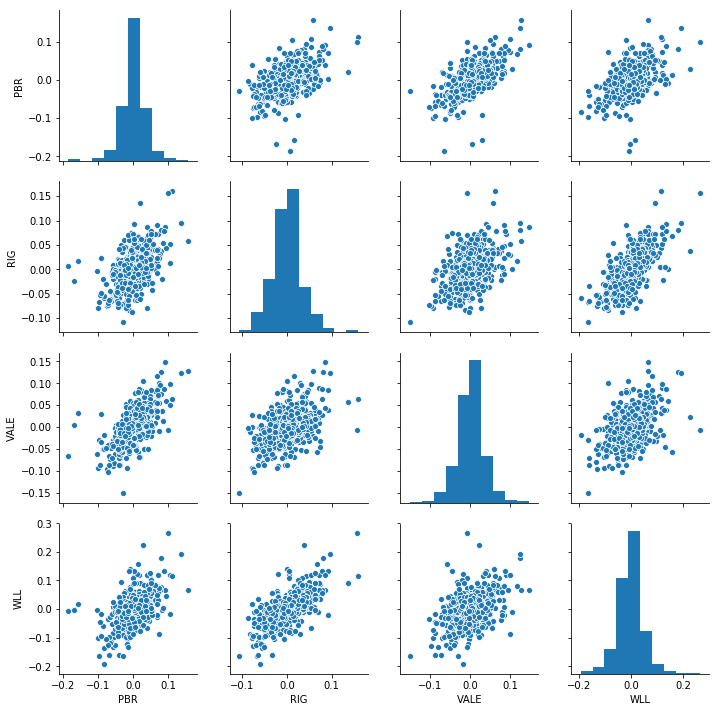

In [21]:
sns.pairplot(stock_change[1:])

In [22]:
stock_change.idxmin()

PBR    2017-05-18
RIG    2016-03-08
VALE   2016-03-08
WLL    2016-01-19
dtype: datetime64[ns]

In [23]:
stock_change.idxmax()

PBR    2016-02-22
RIG    2016-03-04
VALE   2016-02-04
WLL    2016-11-30
dtype: datetime64[ns]

In [24]:
stock_change.std()

PBR     0.034028
RIG     0.032970
VALE    0.034200
WLL     0.049428
dtype: float64

In [25]:
# Sharpe Ratio for Each Stocks
N = 252
returns = stocks.pct_change().dropna()
annualised_sharpe = np.sqrt(N) * returns.mean() / returns.std()
annualised_sharpe

PBR     0.920861
RIG     0.159567
VALE    1.294250
WLL     0.486751
dtype: float64

In [26]:
annualised_sharpe.index

Index(['PBR', 'RIG', 'VALE', 'WLL'], dtype='object')

In [27]:
annualised_sharpe.sort_values()

RIG     0.159567
WLL     0.486751
PBR     0.920861
VALE    1.294250
dtype: float64

In [28]:
annualised_sharpe.sort_index()

PBR     0.920861
RIG     0.159567
VALE    1.294250
WLL     0.486751
dtype: float64

In [29]:
# Equity Sharpe - Buy and Hold
N = 252 # Number of trading in a year
risk = 0.01
excess_daily_ret =  returns - (risk * N)
equity_sharpe = np.sqrt(N) * excess_daily_ret.mean() / excess_daily_ret.std()
equity_sharpe.sort_values()

RIG    -1203.909380
PBR    -1176.186770
VALE   -1161.077579
WLL     -800.577259
dtype: float64

In [30]:
# Market Neutral Sharpe
start = '2016-01-01'
end = '2018-09-10'
market = 'SPY'
ticker = ['PBR', 'VALE', 'RIG', 'WLL']
bench = yf.download(market,start,end)
stocks = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


In [31]:
tick = pd.DataFrame(stocks['Adj Close'])
tick.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-04,4.146681,12.55,2.823366,38.119999
2016-01-05,4.068809,12.15,2.814432,36.160000
2016-01-06,3.844927,11.52,2.599999,31.639999
2016-01-07,3.708651,11.00,2.421305,30.160000
2016-01-08,3.650247,10.75,2.323023,31.080000


In [32]:
daily_rets = tick.pct_change().dropna()
daily_rets.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-05,-0.018779,-0.031873,-0.003164,-0.051417
2016-01-06,-0.055024,-0.051852,-0.076191,-0.125000
2016-01-07,-0.035443,-0.045139,-0.068728,-0.046776
2016-01-08,-0.015748,-0.022727,-0.040591,0.030504
2016-01-11,-0.010667,-0.038140,-0.023077,-0.063063


In [33]:
bench_rets = bench['Adj Close'].pct_change().dropna()
bench_rets.head()

Date
2016-01-05    0.001691
2016-01-06   -0.012614
2016-01-07   -0.023992
2016-01-08   -0.010976
2016-01-11    0.000990
Name: Adj Close, dtype: float64

In [34]:
strat = (daily_rets.sub(bench_rets, axis=0))/2
strat.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-05,-0.010235,-0.016782,-0.002428,-0.026554
2016-01-06,-0.021205,-0.019619,-0.031788,-0.056193
2016-01-07,-0.005726,-0.010574,-0.022368,-0.011392
2016-01-08,-0.002386,-0.005875,-0.014807,0.020740
2016-01-11,-0.005828,-0.019565,-0.012033,-0.032026


In [35]:
N = 252
market_neutral_sharpe = np.sqrt(N) * strat.mean() / strat.std()
market_neutral_sharpe.sort_values()

RIG    -0.151505
WLL     0.298990
PBR     0.674417
VALE    1.084921
dtype: float64